<a href="https://colab.research.google.com/github/cod3astro/kaggle_ML_competition/blob/main/colab_kaggle_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv", index_col='id')
df.drop(columns='day', inplace=True)
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,,,,,,,,,,,
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [3]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall'],
      dtype='object')

In [4]:
for col in df.columns:
  unique_values = df[col].unique()
  print(f"{col} ({len(unique_values)} unique)")
  print(unique_values)

pressure (236 unique)
[1017.4 1019.5 1024.1 1013.4 1021.8 1022.7 1022.8 1019.7 1025.4 1016.8
 1012.5 1020.4 1018.4 1024.3 1022.5 1034.6 1020.2 1022.4 1022.6 1020.6
 1013.  1017.  1019.9 1018.1 1018.5 1024.4 1023.1 1014.4 1018.9 1017.1
 1015.8 1013.1 1015.2 1016.9 1016.5 1023.6 1016.3 1019.6 1018.8 1012.
 1013.3 1017.7 1017.9 1019.4 1020.3 1014.2 1015.  1014.6 1021.4 1015.6
 1014.  1013.5 1011.4 1019.8 1011.  1010.7 1008.1 1012.2 1010.1 1016.
 1009.2 1008.6 1008.3 1008.9 1010.3 1010.9 1009.8 1008.8 1011.1 1007.9
 1006.8 1005.9 1009.5 1011.2 1008.7 1012.4 1009.3 1006.6 1008.5 1008.4
 1008.  1007.6 1009.1 1005.2 1005.6 1006.4 1009.4 1007.5 1006.9 1009.9
 1007.2 1002.5 1006.3 1003.8 1002.8 1010.6 1006.7 1005.4 1006.5 1001.
 1004.8 1004.2 1010.5 1007.8 1011.6 1007.3 1013.6 1014.8 1013.7 1007.1
 1005.8 1005.7 1007.7 1008.2 1010.2 1015.1 1013.2 1004.9 1017.8 1016.4
 1018.  1014.1 1017.3 1014.9 1014.7 1016.1 1016.7 1015.3 1017.5 1014.5
 1020.8 1018.6 1018.7 1022.9 1024.7 1021.1 1023.8 1021.2 1

In [5]:
df.isnull().any()

,0
pressure,False
maxtemp,False
temparature,False
mintemp,False
dewpoint,False
humidity,False
cloud,False
sunshine,False
winddirection,False
windspeed,False


In [6]:
df.shape

(2190, 11)

In [7]:
df.drop_duplicates(inplace=True)
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [9]:
features = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed']
target = 'rainfall'
X = df[features]
y = df[target]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=76)

In [10]:
y.value_counts(normalize=True)

,proportion
rainfall,
1,0.753425
0,0.246575


In [11]:
XX = X.copy()
yy = y.copy()
for col in XX.select_dtypes('float'):
  XX[col] = XX[col].round().astype(int)

In [12]:
for col in XX.select_dtypes('object'):
  XX.loc[:, col], _ = XX[col].factorize()
discrete_features = XX.dtypes == int
yy, _ = pd.factorize(y)

def make_mi_scores(XX, yy, discrete_features):
  mi_scores = mutual_info_classif(XX, yy, discrete_features=discrete_features)
  mi_scores = pd.Series(mi_scores, name='MI Score', index=XX.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

mi_scores = make_mi_scores(XX, yy, discrete_features)
mi_scores

,MI Score
cloud,0.228107
sunshine,0.159198
humidity,0.143732
maxtemp,0.024106
temparature,0.021188
windspeed,0.019926
dewpoint,0.019379
mintemp,0.018801
pressure,0.016516
winddirection,0.015420


In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [14]:
print("Original data shape:", Counter(y))

Original data shape: Counter({1: 1650, 0: 540})


In [15]:
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X, y)
print("Resampled data shape:", Counter(y_res_smote))

Resampled data shape: Counter({1: 1650, 0: 1650})


In [16]:
pd.Series(y_res_smote).value_counts(normalize=True)

,proportion
rainfall,
1,0.5
0,0.5


In [17]:
scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]

In [18]:
tren_X, X_val, tren_y, y_val = train_test_split(X_res_smote, y_res_smote, random_state=76)

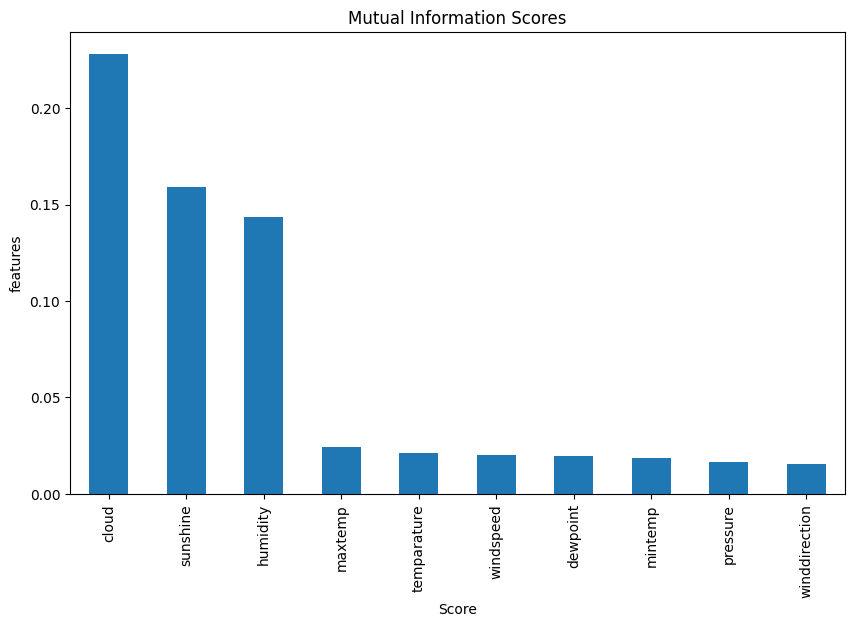

In [19]:
mi_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Mutual Information Scores')
plt.xlabel('Score')
plt.ylabel('features')
plt.show()

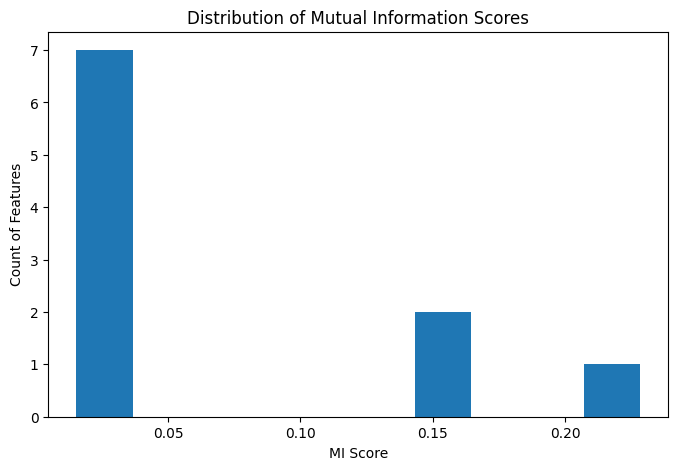

In [20]:
mi_scores.plot(kind='hist', bins=10, figsize=(8, 5))
plt.title('Distribution of Mutual Information Scores')
plt.xlabel('MI Score')
plt.ylabel('Count of Features')
plt.show()

In [48]:
model = Pipeline([
    ('model', DecisionTreeClassifier(random_state=42, max_depth=6, splitter='random'))
])
model.fit(train_X, train_y)
y_preds = model.predict(val_X)
accuracy_score(val_y, y_preds)

0.843065693430657

In [34]:
model = Pipeline([
    ('model', DecisionTreeClassifier(random_state=42, max_depth=6, splitter='best'))
])
model.fit(tren_X, tren_y)
y_preds = model.predict(X_val)
accuracy_score(y_val, y_preds)

0.8412121212121212

In [36]:
param_grid = {
    'n_estimators': [100, 200, 250, 300],
    'max_depth': list(range(4, 10)),
    'min_samples_split': list(range(2, 6)),
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'auto', 'log2']
}
rf = RandomForestClassifier(random_state=5)
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy'
)
grid_search.fit(train_X, train_y)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1920 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
992 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ut

Best parameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.8775761731781451


In [105]:
model = Pipeline([
    ('model', RandomForestClassifier(random_state=42, n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=1))
])
model.fit(train_X, train_y)
y_pred = model.predict(val_X)
accuracy_score(val_y, y_pred)

0.8576642335766423

In [94]:
model = Pipeline([
    ('model', RandomForestClassifier(random_state=42, n_estimators=300, max_depth=20, min_samples_split=5, min_samples_leaf=2,
                                     ))
])
model.fit(tren_X, tren_y)
y_preds = model.predict(X_val)
accuracy_score(y_val, y_preds)

0.8909090909090909

In [47]:
model = Pipeline([
    ('model', XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=280, max_depth=6, learning_rate=0.15))
])
model.fit(train_X, train_y)
xgb_train_preds = model.predict(val_X)
accuracy_score(val_y, xgb_train_preds)

0.8412408759124088

In [118]:
modal = Pipeline([
    ('model', XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=281, max_depth=6, learning_rate=0.15,
                            ))
])
modal.fit(tren_X, tren_y)
xgb_tren_preds = modal.predict(X_val)
print("Accuracy:", accuracy_score(y_val, xgb_tren_preds))
print("Precision:", precision_score(y_val, xgb_tren_preds))
print("Recall:", recall_score(y_val, xgb_tren_preds))
print("F1 Score:", f1_score(y_val, xgb_tren_preds))
print("Confusion Matrix:\n", confusion_matrix(y_val, xgb_tren_preds))

Accuracy: 0.9151515151515152
Precision: 0.9211822660098522
Recall: 0.9077669902912622
F1 Score: 0.9144254278728606
Confusion Matrix:
 [[381  32]
 [ 38 374]]


In [71]:
model = Pipeline([
    ('model', XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, eval_metric='mlogloss', n_estimators=280,
                            max_depth=6, learning_rate=0.1))
])
model.fit(train_X, train_y)
xgb_train_scale_preds = model.predict(val_X)
accuracy_score(val_y, xgb_train_scale_preds)

0.8357664233576643

In [108]:
model = Pipeline([
    ('model', LGBMClassifier(random_state=42, n_estimators=30, max_depth=6, learning_rate=0.1, num_leaves=20, reg_lambda=0.4))
])
model.fit(train_X, train_y)
lgbm_train_preds = model.predict(val_X)
accuracy_score(val_y, lgbm_train_preds)

[LightGBM] [Info] Number of positive: 1251, number of negative: 391
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 1642, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.761876 -> initscore=1.162991
[LightGBM] [Info] Start training from score 1.162991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


0.8667883211678832

In [109]:
model = Pipeline([
    ('model', LGBMClassifier(random_state=42, n_estimators=30, max_depth=6, learning_rate=0.1, num_leaves=20, reg_lambda=0.4))
])
model.fit(tren_X, tren_y)
lgbm_train_preds = model.predict(X_val)
accuracy_score(y_val, lgbm_train_preds)

[LightGBM] [Info] Number of positive: 1238, number of negative: 1237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2507
[LightGBM] [Info] Number of data points in the train set: 2475, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500202 -> initscore=0.000808
[LightGBM] [Info] Start training from score 0.000808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


0.8727272727272727

In [119]:
test_X = pd.read_csv('test.csv', index_col='id')
test_X.drop(columns='day', inplace=True)
test_preds = modal.predict(test_X)